In [1]:
import os
import glob
import yaml
import subprocess
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
# !pip install ir2vec

In [3]:
import ir2vec

---

In [4]:
data_dir = 'ir2perf-corpus/'

In [5]:
records = os.listdir(data_dir)

In [6]:
os.listdir(os.path.join(data_dir, records[20]))

['default_11886779297610357306_0.profraw',
 'default_11886779297610357306_0.yaml',
 'default_6716724584973532524_0.profraw',
 'default_6716724584973532524_0.yaml',
 'default_738359801829934391_0.profraw',
 'default_738359801829934391_0.yaml',
 'default_738365484073764151_0.profraw',
 'default_738365484073764151_0.yaml',
 'default_738643633654277431_0.profraw',
 'default_738643633654277431_0.yaml',
 'default_739117145305148727_0.profraw',
 'default_739117145305148727_0.yaml',
 'functionobjects.ll',
 'functionobjects.perf',
 'functionobjects.perfdata',
 'locales.ll',
 'locales.perf',
 'locales.perfdata',
 'loop_removal.ll',
 'loop_removal.perf',
 'loop_removal.perfdata',
 'machine.ll',
 'machine.perf',
 'machine.perfdata',
 'rotate_bits.ll',
 'rotate_bits.perf',
 'rotate_bits.perfdata',
 'scalar_replacement_structs.ll',
 'scalar_replacement_structs.perf',
 'scalar_replacement_structs.perfdata']

In [7]:
prof_id_to_filename = {
    '11886779297610357306': 'machine',
    '738643633654277431': 'functionobjects',
    '738365484073764151': 'loop_removal',
    '6716724584973532524': 'locales',
    '738359801829934391': 'rotate_bits',
    '739117145305148727': 'scalar_replacement_structs'
}

filename_to_prof_id = {v: k for k, v in prof_id_to_filename.items()}

In [8]:
dir_name = 'tmp-corpus'
basename = dir_name
# tokens = dir_name.split('T')

# heuristic_value = tokens[0]
# timestamp = tokens[1]

# basename = os.path.join(data_dir, dir_name)

IRs = glob.glob(os.path.join(basename, '*.ll')) # :o they're coming for your taxes!
perfs = glob.glob(os.path.join(basename, '*.csv'))
profraws = glob.glob(os.path.join(basename, '*.yaml'))

data = zip(
        sorted(IRs, key=lambda x:os.stat(x).st_mtime),
        sorted(perfs, key=lambda x:os.stat(x).st_mtime),
        sorted(profraws, key=lambda x:os.stat(x).st_mtime),
    )

In [9]:
os.listdir(dir_name)

['default_6716724584973532524_0.profraw',
 'loop_removal.ll',
 'locales.ll',
 'machine.perf',
 'rotate_bits.ll',
 'scalar_replacement_structs.perf',
 'rotate_bits.perf',
 'default_738643633654277431_0.profraw',
 'functionobjects.ll',
 'functionobjects.perf',
 'locales.perf',
 'loop_removal.perf',
 'default_11886779297610357306_0.profraw',
 'default_738365484073764151_0.profraw',
 'default_738359801829934391_0.profraw',
 'scalar_replacement_structs.ll',
 'default_739117145305148727_0.profraw',
 'machine.ll',
 'functionobjects.perfdata',
 'functionobjects.yaml',
 'default_11886779297610357306_0.yaml',
 'default_6716724584973532524_0.yaml',
 'default_738359801829934391_0.yaml',
 'default_738365484073764151_0.yaml',
 'default_738643633654277431_0.yaml',
 'default_739117145305148727_0.yaml',
 'locales.perfdata',
 'loop_removal.perfdata',
 'machine.perfdata',
 'rotate_bits.perfdata',
 'scalar_replacement_structs.perfdata']

In [10]:
file = "rotate_bits"

IR = f'{dir_name}/{file}.ll'
profraw = f'{dir_name}/default_{filename_to_prof_id[file]}_0.yaml'
perf = f'{dir_name}/{file}.perfdata'

In [11]:
init_obj = ir2vec.initEmbedding(IR, "fa", "p")
pv = np.array(init_obj.getProgramVector())
print("pv.shape =", pv.shape)

pv.shape = (300,)


In [12]:
embeddings = init_obj.getFunctionVectors()

In [13]:
f_init_obj = ir2vec.initEmbedding(IR, "fa", "f")
fpv = np.array(init_obj.getProgramVector())

p_init_obj = ir2vec.initEmbedding(IR, "fa", "p")
ppv = np.array(init_obj.getProgramVector())

f_embeddings = f_init_obj.getFunctionVectors()
p_embeddings = p_init_obj.getFunctionVectors()

set(f_embeddings.keys()) - set(p_embeddings.keys())

set()

In [14]:
f_embeddings.keys() == p_embeddings.keys()

True

that's sick as hell! thanks ir2vec!

In [15]:
prof_data = None
with open(profraw, 'r') as datafile:
    prof_data = yaml.load(datafile, Loader=yaml.CLoader)
    print("prof_data =", prof_data.keys())

prof_data = dict_keys(['Counters', 'Instrumentation level', 'Functions shown', 'Total functions', 'Maximum function count', 'Maximum internal block count'])


Functions

$N_{func}$

In [16]:
Nfuncs = [(k, prof_data['Counters'][k]['Counters']) for k in prof_data['Counters'].keys()]
Nfuncs = {k: v for (k, v) in Nfuncs}
Nfuncs

{'_Z13record_resultdPKc': 4,
 '_Z9summarizePKciiii': 11,
 '_Z17summarize_simplefP8_IO_FILEPKc': 6,
 '_Z11start_timerv': 1,
 '_Z5timerv': 1,
 'main': 9,
 '_Z13test_constantIh21rotate_right_constantIhEEvPT_iPKc': 4,
 '_Z13test_constantIh22rotate_right_constant2IhEEvPT_iPKc': 4,
 '_Z13test_constantIh22rotate_right_constant3IhEEvPT_iPKc': 4,
 '_Z13test_constantIh22rotate_right_constant4IhEEvPT_iPKc': 4,
 '_Z13test_constantIt21rotate_right_constantItEEvPT_iPKc': 4,
 '_Z13test_constantIt22rotate_right_constant2ItEEvPT_iPKc': 4,
 '_Z13test_constantIt22rotate_right_constant3ItEEvPT_iPKc': 4,
 '_Z13test_constantIt22rotate_right_constant4ItEEvPT_iPKc': 4,
 '_Z13test_constantIj21rotate_right_constantIjEEvPT_iPKc': 4,
 '_Z13test_constantIj22rotate_right_constant2IjEEvPT_iPKc': 4,
 '_Z13test_constantIj22rotate_right_constant3IjEEvPT_iPKc': 4,
 '_Z13test_constantIj22rotate_right_constant4IjEEvPT_iPKc': 4,
 '_Z13test_constantIm21rotate_right_constantImEEvPT_iPKc': 4,
 '_Z13test_constantIm22rotate_rig

Reading the perf data

In [17]:
rows = []
with open(perf, 'r') as datafile:
    datafile_iter = iter(datafile)
    
    total_cycles = int(next(datafile_iter))
    total_samples = int(next(datafile_iter))
    
    for line in datafile_iter:
        samples, func = line.split(' ', 1)
        rows.append((perf.split('/')[-1].split('.')[0], func[:-4].strip(), int(samples)))
df = pd.DataFrame(rows, columns=["source", "function", "samples"])
df.head()

,source,function,samples
0,rotate_bits,_start,0
1,rotate_bits,__libc_start_main,0
2,rotate_bits,main,0
3,rotate_bits,_Z19test_variable_shiftIm21rotate_left_variabl...,3549
4,rotate_bits,_Z19test_variable_shiftIm21rotate_left_variabl...,3316


In [18]:
df.function.apply(lambda x: x in Nfuncs).sum()

65

Some functions are duplicated... not sure why, but they don't seem to be impactful (0 samples, not the functions we care about)

In [19]:
df[df.function.duplicated()]

,source,function,samples
109,rotate_bits,el0t_64_sync,0
110,rotate_bits,el0t_64_sync_handler,0
111,rotate_bits,el0_svc,0
112,rotate_bits,do_el0_svc,0
113,rotate_bits,el0_svc_common.constprop.0,0
114,rotate_bits,invoke_syscall,0
115,rotate_bits,__arm64_sys_execve,0
116,rotate_bits,do_execveat_common.isra.0,0
117,rotate_bits,bprm_execve,0
118,rotate_bits,load_elf_binary,0


Assemble the complete data frame!

In [20]:
df['Tfunc'] = (df.samples / total_samples) * total_cycles
df.head()

,source,function,samples,Tfunc
0,rotate_bits,_start,0,0.000000e+00
1,rotate_bits,__libc_start_main,0,0.000000e+00
2,rotate_bits,main,0,0.000000e+00
3,rotate_bits,_Z19test_variable_shiftIm21rotate_left_variabl...,3549,1.403481e+10
4,rotate_bits,_Z19test_variable_shiftIm21rotate_left_variabl...,3316,1.311339e+10


In [21]:
df['Nfunc'] = df.function.map(Nfuncs).fillna(0)
df.head()

,source,function,samples,Tfunc,Nfunc
0,rotate_bits,_start,0,0.000000e+00,0.0
1,rotate_bits,__libc_start_main,0,0.000000e+00,0.0
2,rotate_bits,main,0,0.000000e+00,9.0
3,rotate_bits,_Z19test_variable_shiftIm21rotate_left_variabl...,3549,1.403481e+10,4.0
4,rotate_bits,_Z19test_variable_shiftIm21rotate_left_variabl...,3316,1.311339e+10,4.0


In [22]:
df['runtime'] = (total_cycles * df.Tfunc) / df.Nfunc
df.runtime = df.runtime.replace([np.inf, -np.inf], np.nan) # for later filtering
df.head()

,source,function,samples,Tfunc,Nfunc,runtime
0,rotate_bits,_start,0,0.000000e+00,0.0,NaN
1,rotate_bits,__libc_start_main,0,0.000000e+00,0.0,NaN
2,rotate_bits,main,0,0.000000e+00,9.0,0.000000e+00
3,rotate_bits,_Z19test_variable_shiftIm21rotate_left_variabl...,3549,1.403481e+10,4.0,1.285519e+21
4,rotate_bits,_Z19test_variable_shiftIm21rotate_left_variabl...,3316,1.311339e+10,4.0,1.201121e+21


In [23]:
# https://stackoverflow.com/questions/6526500/c-name-mangling-library-for-python
def demangle(name):
    args = ['c++filt']
    args.extend([name])
    pipe = subprocess.Popen(args, stdin=subprocess.PIPE, stdout=subprocess.PIPE)
    stdout, _ = pipe.communicate()
    demangled = stdout.decode('utf-8').split("\n")

    # Each line ends with a newline, so the final entry of the split output
    # will always be ''.
    assert len(demangled) == 2#len(names)+1
    return demangled[0]

demangle('_Z10quicksort1IPdPFbddEEvT_S3_T0_')

'void quicksort1<double*, bool (*)(double, double)>(double*, double*, bool (*)(double, double))'

In [24]:
df['embeddings'] = df.function.map(demangle).map(embeddings).apply(lambda x: x['vector'] if type(x) is dict else np.nan)
df.head()

,source,function,samples,Tfunc,Nfunc,runtime,embeddings
0,rotate_bits,_start,0,0.000000e+00,0.0,NaN,NaN
1,rotate_bits,__libc_start_main,0,0.000000e+00,0.0,NaN,NaN
2,rotate_bits,main,0,0.000000e+00,9.0,0.000000e+00,"[-31.007856020722954, -53.022343591837014, -91..."
3,rotate_bits,_Z19test_variable_shiftIm21rotate_left_variabl...,3549,1.403481e+10,4.0,1.285519e+21,"[-3.285874809368665, -5.781666683506162, -12.0..."
4,rotate_bits,_Z19test_variable_shiftIm21rotate_left_variabl...,3316,1.311339e+10,4.0,1.201121e+21,"[-3.285874809368665, -5.781666683506162, -12.0..."


In [25]:
df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 2 to 66
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   source      65 non-null     object 
 1   function    65 non-null     object 
 2   samples     65 non-null     int64  
 3   Tfunc       65 non-null     float64
 4   Nfunc       65 non-null     float64
 5   runtime     65 non-null     float64
 6   embeddings  65 non-null     object 
dtypes: float64(3), int64(1), object(3)
memory usage: 4.1+ KB


Now that we know how to read the data, formalize into a method

In [26]:
basename = 'tmp-corpus'
IRs = glob.glob(os.path.join(basename, '*.ll')) # :o they're coming for your taxes!
perfs = glob.glob(os.path.join(basename, '*.perfdata'))
profraws = glob.glob(os.path.join(basename, '*.yaml'))

data = zip(
    sorted(IRs, key=lambda x:os.stat(x).st_mtime),
    sorted(perfs, key=lambda x:os.stat(x).st_mtime),
    sorted(profraws, key=lambda x:os.stat(x).st_mtime),
)

In [27]:
[d for d in data]

[('tmp-corpus/machine.ll',
  'tmp-corpus/machine.perfdata',
  'tmp-corpus/functionobjects.yaml'),
 ('tmp-corpus/functionobjects.ll',
  'tmp-corpus/scalar_replacement_structs.perfdata',
  'tmp-corpus/default_6716724584973532524_0.yaml'),
 ('tmp-corpus/loop_removal.ll',
  'tmp-corpus/rotate_bits.perfdata',
  'tmp-corpus/default_738643633654277431_0.yaml'),
 ('tmp-corpus/locales.ll',
  'tmp-corpus/functionobjects.perfdata',
  'tmp-corpus/default_11886779297610357306_0.yaml'),
 ('tmp-corpus/rotate_bits.ll',
  'tmp-corpus/locales.perfdata',
  'tmp-corpus/default_738365484073764151_0.yaml'),
 ('tmp-corpus/scalar_replacement_structs.ll',
  'tmp-corpus/loop_removal.perfdata',
  'tmp-corpus/default_738359801829934391_0.yaml')]

In [28]:
def unobscure_profraw_name(profraw):
    return prof_id_to_filename[profraw.split('/')[-1].split('.')[0].split('_')[1]]

def parse_sample(dir_name: str, root_dir=data_dir):
    tokens = dir_name.split('T')

    heuristic_value = tokens[0]
    timestamp = tokens[1]
    
    basename = os.path.join(root_dir, dir_name)

    IRs = glob.glob(os.path.join(basename, '*.ll')) # :o they're coming for your taxes!
    perfs = glob.glob(os.path.join(basename, '*.perfdata'))
    profraws = glob.glob(os.path.join(basename, '*.yaml'))
    
    data = zip(
        sorted(IRs, key=lambda x: x),
        sorted(perfs, key=lambda x: x),
        sorted(profraws, key=lambda x: unobscure_profraw_name(x)),
    )
    
    sample_df = pd.DataFrame(columns=["source", "function", "samples", "Tfunc", "Nfunc", "runtime", "embeddings"])
    for (IR, perf, profraw) in data:
#         print(IR, perf, profraw, sep='\n')
#         print()
        
        assert unobscure_profraw_name(profraw) == perf.split('/')[-1].split('.')[0], "grabbed the wrong profraw :("

        # pull Tfunc and RT out of perf data
        rows = []
        total_cycles = 0
        total_samples = 0
        with open(perf, 'r') as datafile:
            datafile_iter = iter(datafile)

            total_cycles = int(next(datafile_iter))
            total_samples = int(next(datafile_iter))

            for line in datafile_iter:
                samples, func = line.split(' ', 1)
                rows.append(
                    (
                        perf.split('/')[-1].split('.')[0], 
                        func[:-4].strip(), 
                        int(samples)
                    )
                )
        df = pd.DataFrame(rows, columns=["source", "function", "samples"])
        df['Tfunc'] = (df.samples / total_samples) * total_cycles

        # pull Nfunc out of profraw
        prof_data = None
        with open(profraw, 'r') as datafile:
            prof_data = yaml.load(datafile, Loader=yaml.CLoader)
        Nfuncs = [(k, prof_data['Counters'][k]['Counters']) for k in prof_data['Counters'].keys()]
        Nfuncs = {k: v for (k, v) in Nfuncs}
        df['Nfunc'] = df.function.map(Nfuncs).fillna(0)
        
        # calculate runtime value
        df['runtime'] = (total_cycles * df.Tfunc) / df.Nfunc
        df.runtime = df.runtime.replace([np.inf, -np.inf], np.nan) # for later filtering
        
        # embed IR
        init_obj = ir2vec.initEmbedding(IR, "fa", "f") # TODO: may need to tweak these!
        embeddings = init_obj.getFunctionVectors()
        df['embeddings'] = df.function.map(demangle).map(embeddings).apply(lambda x: x['vector'] if type(x) is dict else np.nan)
        
        sample_df = pd.concat([sample_df, df.dropna()])
    
    sample_df['heuristic_value'] = heuristic_value
    return sample_df

# parse_sample(samples[0])

In [29]:
parse_sample(os.listdir(data_dir)[300])

,source,function,samples,Tfunc,Nfunc,runtime,embeddings,heuristic_value


In [30]:
data_dir = 'all-the-data/ir2perf-corpus'
pickle_path = 'all-the-data-df-3.pickle'

# data_dir = 'ir2perf-corpus'
# pickle_path = 'saved-df-2.pickle'

In [31]:
if os.path.exists(pickle_path):
    df = pd.read_pickle(pickle_path)
else:
    df = pd.DataFrame(columns=["source", "function", "samples", "Tfunc", "Nfunc", "runtime", "embeddings"])
    skipped = 0
    for _dir in tqdm(os.listdir(data_dir)):

        perf_data_test = glob.glob(os.path.join(data_dir, _dir, '*.perfdata'))
        profraw_data_test = glob.glob(os.path.join(data_dir, _dir, '*.yaml'))
        ir_data_test = glob.glob(os.path.join(data_dir, _dir, '*.ll'))
        if len(perf_data_test) != 6 or len(profraw_data_test) != 6 or len(ir_data_test) != 6:
            skipped += 1
            continue

        sample_df = parse_sample(_dir)
        df = pd.concat((df, sample_df))
    df.to_pickle(pickle_path)

Correct types

In [32]:
df.source = df.source.astype('category')
df.function = df.function.astype('category')
df.samples = df.samples.astype(int)
df.heuristic_value = df.heuristic_value.astype(int)

In [33]:
(df.samples == 0).sum()

17798

In [34]:
df = df[df.samples > 0] # drop everything we don't have meaningful data for

---

More eda

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111844 entries, 2 to 31
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   source           111844 non-null  category
 1   function         111844 non-null  category
 2   samples          111844 non-null  int64   
 3   Tfunc            111844 non-null  float64 
 4   Nfunc            111844 non-null  float64 
 5   runtime          111844 non-null  float64 
 6   embeddings       111844 non-null  object  
 7   heuristic_value  111844 non-null  int64   
dtypes: category(2), float64(3), int64(2), object(1)
memory usage: 6.3+ MB


---

EDA type beat

<Axes: title={'center': 'Records from each Source'}, xlabel='Source', ylabel='# of Records'>

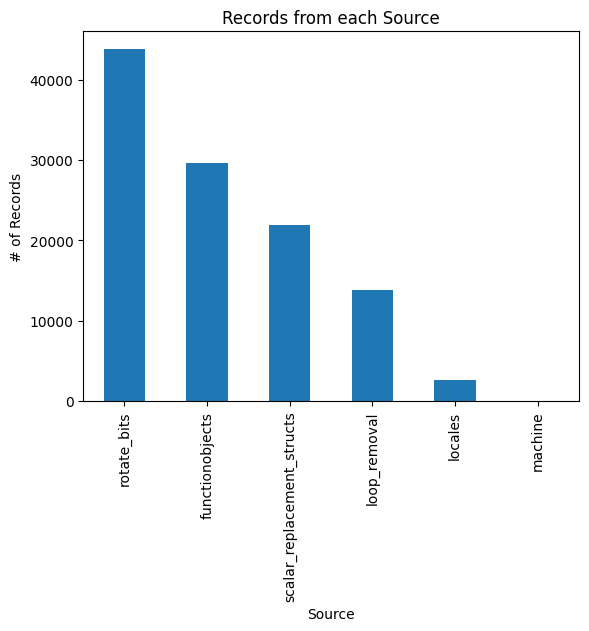

In [36]:
df.source.value_counts().plot.bar(title='Records from each Source',
                                  xlabel='Source',
                                  ylabel='# of Records')

<Axes: title={'center': '# of Unique Functions per Source'}, xlabel='Source', ylabel='# of Unique Functions'>

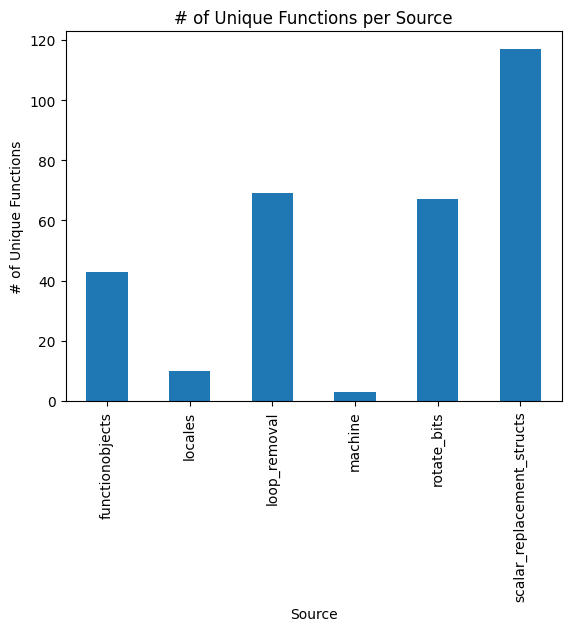

In [37]:
df.groupby('source').function.nunique().plot.bar(title='# of Unique Functions per Source',
                                                 xlabel='Source',
                                                 ylabel='# of Unique Functions')

<Axes: title={'center': 'Avg. Runtime for Each Source'}, xlabel='Source', ylabel='Avg. Runtime (Cycles)'>

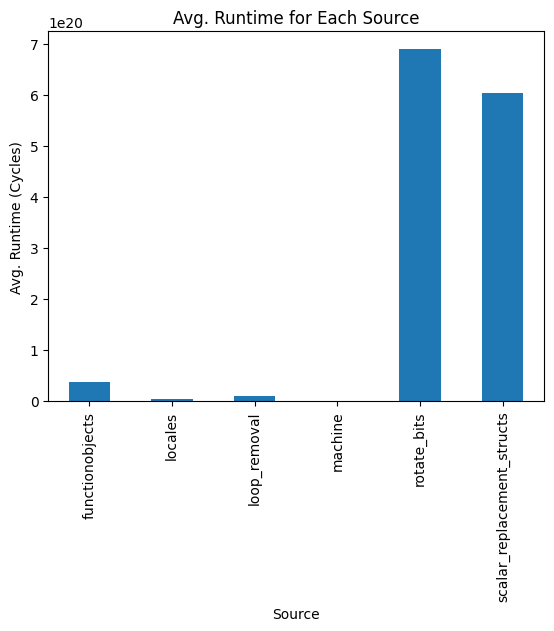

In [38]:
df.groupby('source').runtime.mean().plot.bar(title='Avg. Runtime for Each Source',
                                             xlabel='Source',
                                             ylabel='Avg. Runtime (Cycles)')

Text(0.5, 1.0, '# of Instances for each Heuristic Threshold')

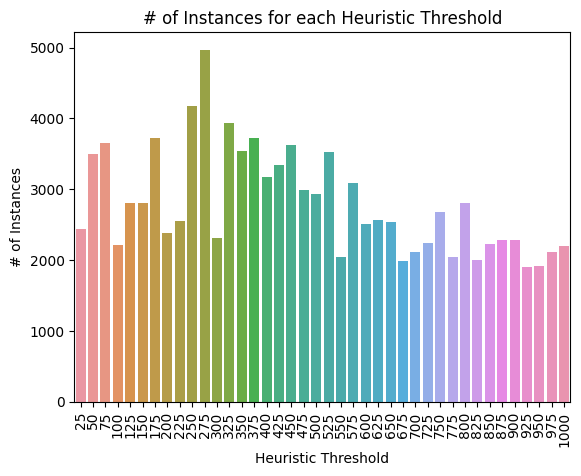

In [39]:
sns.barplot(x=df.heuristic_value.value_counts(sort=False).index,
            y=df.heuristic_value.value_counts(sort=False))
plt.xticks(rotation=90);

plt.xlabel('Heuristic Threshold')
plt.ylabel('# of Instances')
plt.title('# of Instances for each Heuristic Threshold')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'functionobjects'),
  Text(1, 0, 'locales'),
  Text(2, 0, 'loop_removal'),
  Text(3, 0, 'machine'),
  Text(4, 0, 'rotate_bits'),
  Text(5, 0, 'scalar_replacement_structs')])

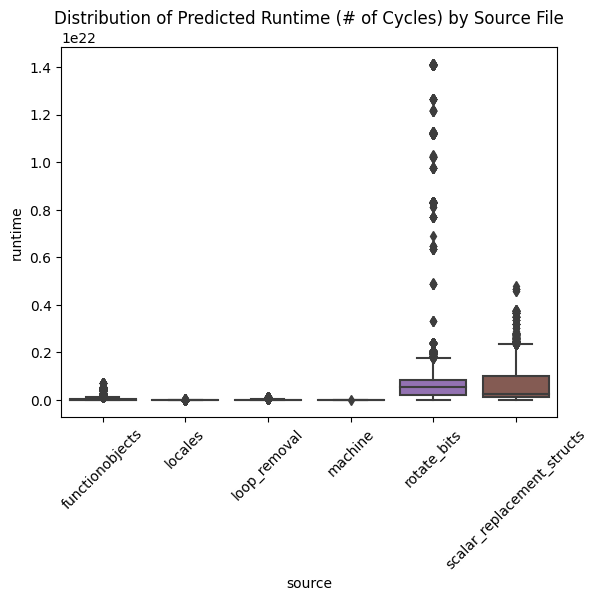

In [40]:
sns.boxplot(x=df.source, y=df.runtime)

plt.title('Distribution of Predicted Runtime (# of Cycles) by Source File')
plt.xticks(rotation=45)

<Axes: title={'center': 'Histogram of Runtime'}, ylabel='Frequency'>

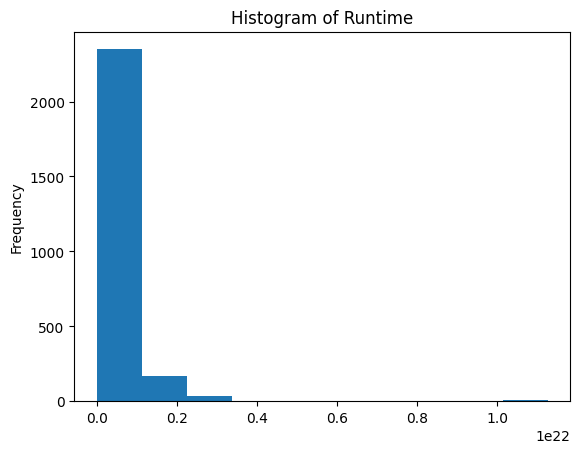

In [41]:
df[df.heuristic_value == 225].runtime.plot.hist(title='Histogram of Runtime',xlabel='runtime',ylabel='Freq')

In [42]:
df[df.function == 'main'].source.value_counts()

functionobjects               1160
rotate_bits                    735
loop_removal                   194
locales                         85
scalar_replacement_structs      56
machine                          2
Name: source, dtype: int64

In [43]:
df[df.function == 'main'].groupby(['source', 'heuristic_value']).runtime.describe()

count          mean           std  \
source                     heuristic_value                                      
functionobjects            25                25.0  5.692844e+18  6.177987e+18   
                           50                36.0  7.369548e+18  8.185117e+18   
                           75                35.0  6.297508e+18  7.928425e+18   
                           100               24.0  7.023168e+18  7.777791e+18   
                           125               29.0  6.069074e+18  6.539329e+18   
...                                           ...           ...           ...   
scalar_replacement_structs 750                1.0  8.467125e+15           NaN   
                           775                1.0  8.462401e+15           NaN   
                           825                1.0  8.462637e+15           NaN   
                           850                1.0  8.459917e+15           NaN   
                           1000               1.0  8.469813e+15           NaN   

                                                     min           25%  \
source                     heuristic_value                               
functionobjects            25               1.428615e+18  1.542507e+18   
                           50               1.461006e+18  2.175712e+18   
                           75               1.470860e+18  1.568282e+18   
                           100              1.464728e+18  2.232161e+18   
                           125              1.455877e+18  2.218146e+18   
...                                                  ...           ...   
scalar_replacement_structs 750              8.467125e+15  8.467125e+15   
                           775              8.462401e+15  8.462401e+15   
                           825              8.462637e+15  8.462637e+15   
                           850              8.459917e+15  8.459917e+15   
                           1000             8.469813e+15  8.469813e+15   

                                                     50%           75%  \
source                     heuristic_value                               
functionobjects            25               2.260666e+18  9.793892e+18   
                           50               2.282539e+18  9.837793e+18   
                           75               2.248099e+18  7.400469e+18   
                           100              2.257891e+18  9.873826e+18   
                           125              2.280999e+18  7.441266e+18   
...                                                  ...           ...   
scalar_replacement_structs 750              8.467125e+15  8.467125e+15   
                           775              8.462401e+15  8.462401e+15   
                           825              8.462637e+15  8.462637e+15   
                           850              8.459917e+15  8.459917e+15   
                           1000             8.469813e+15  8.469813e+15   

                                                     max  
source                     heuristic_value                
functionobjects            25               2.277554e+19  
                           50               2.306165e+19  
                           75               2.291497e+19  
                           100              2.280674e+19  
                           125              2.299134e+19  
...                                                  ...  
scalar_replacement_structs 750              8.467125e+15  
                           775              8.462401e+15  
                           825              8.462637e+15  
                           850              8.459917e+15  
                           1000             8.469813e+15  

[147 rows x 8 columns]

<Figure size 640x480 with 0 Axes>

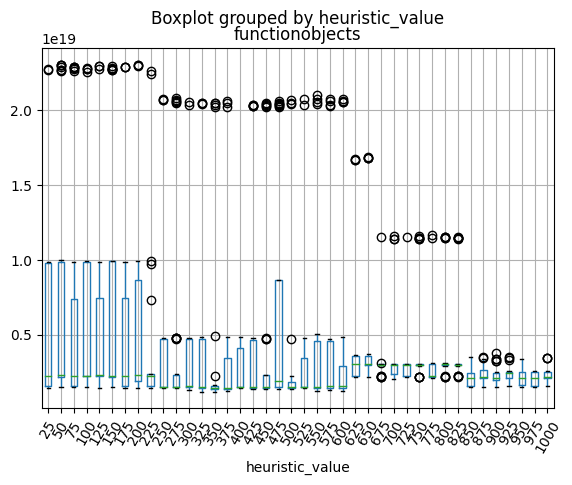

<Figure size 640x480 with 0 Axes>

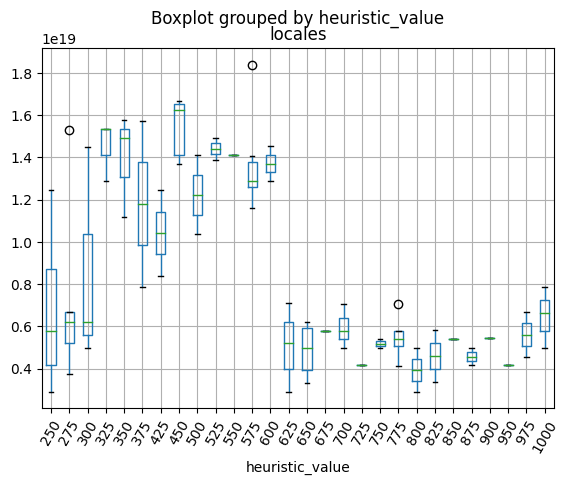

<Figure size 640x480 with 0 Axes>

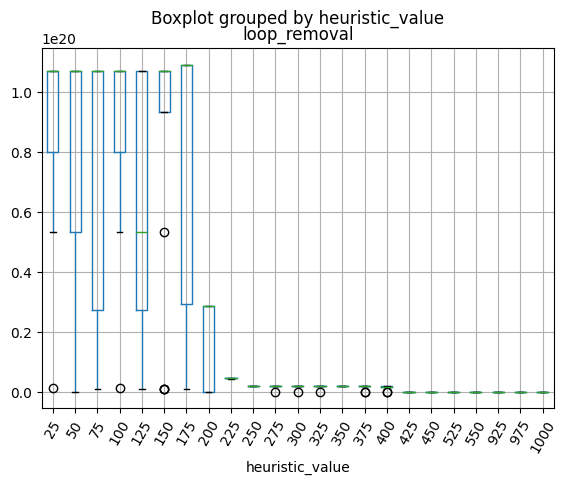

<Figure size 640x480 with 0 Axes>

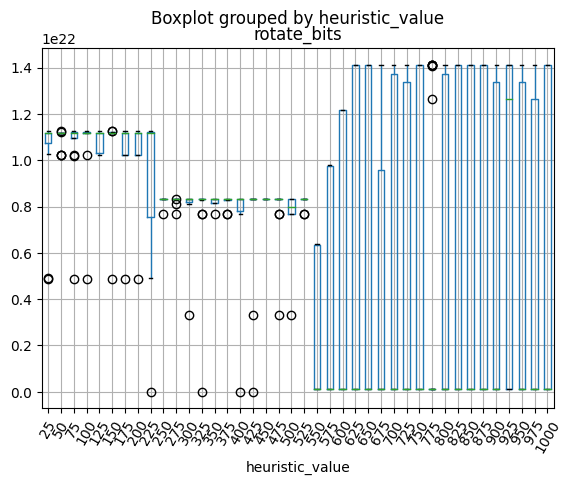

<Figure size 640x480 with 0 Axes>

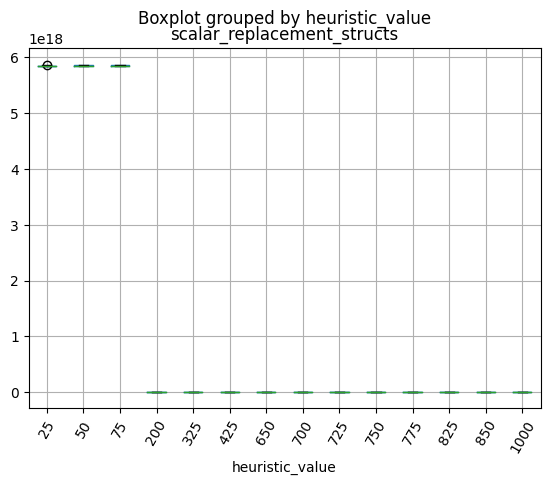

<Figure size 640x480 with 0 Axes>

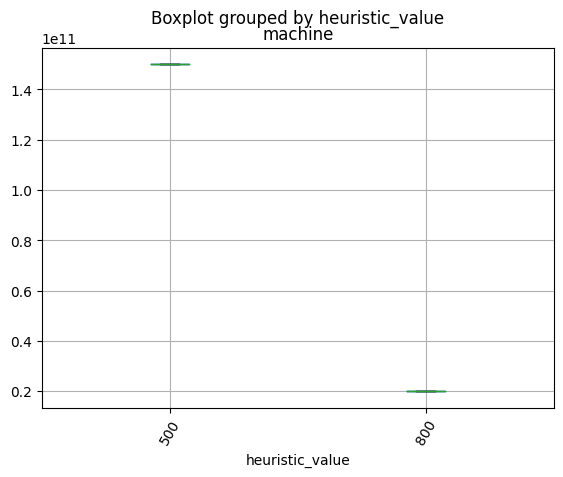

In [44]:
for source in df.source.unique():
    plt.figure()
    df[(df.function == 'main') & (df.source == source)]\
        .boxplot(column='runtime',
                 by='heuristic_value',
                 rot=60)
    plt.title(source)

Lets drop machine since it only has a handful of samples

In [45]:
len(df[df.source == 'machine'])

6

In [46]:
df = df[df.source != 'machine']

In [47]:
from sklearn.decomposition import PCA

In [48]:
pca = PCA(n_components=7)
embeddings = np.stack(df.embeddings.map(np.array).to_numpy())
embeddings = pca.fit_transform(embeddings)

Text(0, 0.5, 'Explained Variance Ratio')

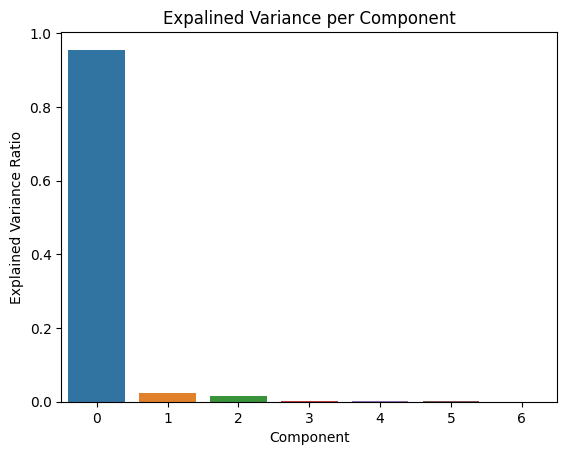

In [49]:
sns.barplot(x=np.arange(pca.n_components_), y=pca.explained_variance_ratio_)
plt.title("Expalined Variance per Component")
plt.xlabel("Component")
plt.ylabel("Explained Variance Ratio")

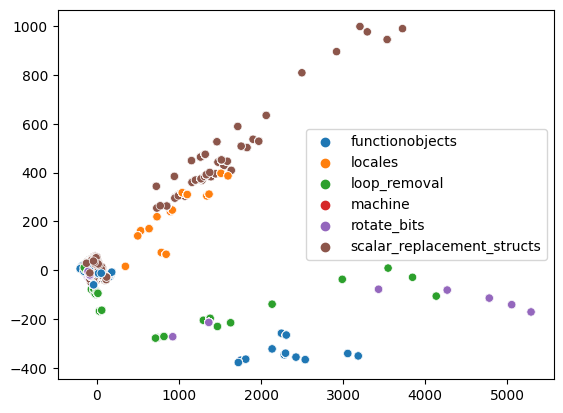

In [50]:
c1, c2 = np.argsort(pca.explained_variance_ratio_)[-2:][::-1]

sns.scatterplot(
    x=embeddings[:,c1],
    y=embeddings[:,c2],
    hue=df.source
)
plt.legend()

---

Extract baseline and set up training infrastructure

In [51]:
df.groupby('source').function.unique().map(len)

source
functionobjects                43
locales                        10
loop_removal                   69
machine                         0
rotate_bits                    67
scalar_replacement_structs    117
Name: function, dtype: int64

In [52]:
df[df.heuristic_value == 225].groupby('source').function.unique().map(len)

source
functionobjects               40
locales                        4
loop_removal                  55
machine                        0
rotate_bits                   66
scalar_replacement_structs    91
Name: function, dtype: int64

In [53]:
baseline_df = parse_sample('225Tir2perf-baseline', root_dir='')

In [54]:
baseline_df.head()

,source,function,samples,Tfunc,Nfunc,runtime,embeddings,heuristic_value
2,functionobjects,main,2554,1.007930e+10,124.0,7.290229e+18,"[-59.63605577047524, -69.30000504215926, -170....",225
3,functionobjects,_Z10quicksort1IPdFbddEEvT_S2_T0_,920,3.630758e+09,6.0,5.427234e+19,"[-1.657481918266336, -1.2896442407567201, -3.9...",225
4,functionobjects,_ZSt13__adjust_heapIPdldN9__gnu_cxx5__ops15_It...,7510,2.963804e+10,7.0,3.797378e+20,"[-1.7546317175162347, -2.3451119542326087, -4....",225
5,functionobjects,_Z11TestOneSortIPdPFvS0_S0_PFbddEES2_EvT_S5_ii...,2000,7.892952e+09,5.0,1.415800e+20,"[-2.174804462475368, -2.9584139940149585, -5.7...",225
6,functionobjects,_Z10quicksort2IPdXadL_Z19less_than_function2dd...,941,3.713634e+09,6.0,5.551116e+19,"[-1.8554271478373168, -0.9362537891719809, -5....",225


In [55]:
# aug_df = df.merge(baseline_df[['source', 'function', 'runtime']],
#                   left_on=['source', 'function'],
#                   right_on=['source', 'function'],
#                   how='inner',
#                   validate='m:1')

In [56]:
aug_df = df.copy()
aug_df['runtime_x'] = df.runtime
aug_df['runtime_y'] = df.groupby(['source', 'function']).runtime.transform('mean')

In [57]:
aug_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111838 entries, 2 to 31
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   source           111838 non-null  category
 1   function         111838 non-null  category
 2   samples          111838 non-null  int64   
 3   Tfunc            111838 non-null  float64 
 4   Nfunc            111838 non-null  float64 
 5   runtime          111838 non-null  float64 
 6   embeddings       111838 non-null  object  
 7   heuristic_value  111838 non-null  int64   
 8   runtime_x        111838 non-null  float64 
 9   runtime_y        111838 non-null  float64 
dtypes: category(2), float64(5), int64(2), object(1)
memory usage: 8.0+ MB


In [58]:
aug_df.runtime_x.isna().sum(), aug_df.runtime_y.isna().sum()

(0, 0)

<Axes: ylabel='Frequency'>

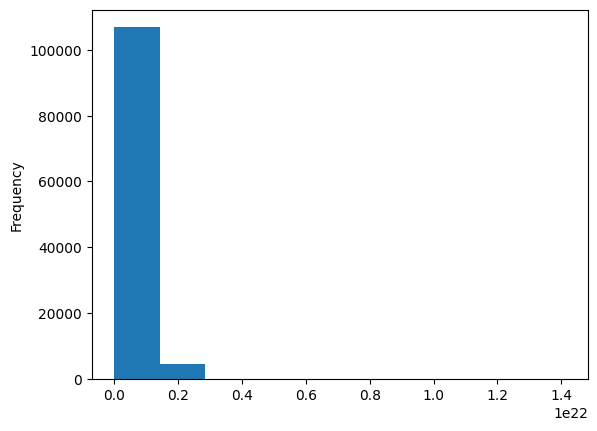

In [59]:
aug_df.runtime_x.plot.hist()

<Axes: ylabel='Frequency'>

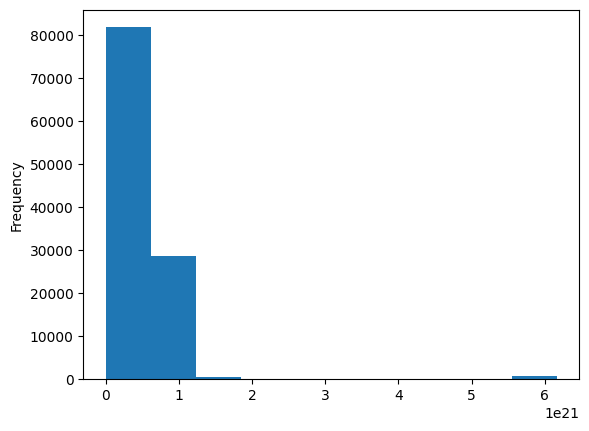

In [60]:
aug_df.runtime_y.plot.hist()

In [61]:
(aug_df.runtime_x == 0).sum(), (aug_df.runtime_y == 0).sum()

(0, 0)

Compute speedup

In [62]:
aug_df['speedup'] = aug_df.runtime_x / aug_df.runtime_y
#aug_df['speedup'] = aug_df.speedup.replace([np.inf, -np.inf], np.nan)

In [63]:
aug_df = aug_df.dropna()

In [64]:
aug_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111838 entries, 2 to 31
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   source           111838 non-null  category
 1   function         111838 non-null  category
 2   samples          111838 non-null  int64   
 3   Tfunc            111838 non-null  float64 
 4   Nfunc            111838 non-null  float64 
 5   runtime          111838 non-null  float64 
 6   embeddings       111838 non-null  object  
 7   heuristic_value  111838 non-null  int64   
 8   runtime_x        111838 non-null  float64 
 9   runtime_y        111838 non-null  float64 
 10  speedup          111838 non-null  float64 
dtypes: category(2), float64(6), int64(2), object(1)
memory usage: 8.9+ MB


Remove redundant and over/unders (>3x speedup, overhead <1%)

In [65]:
print(
    round((aug_df.speedup >= 3).sum() / len(aug_df), 4)*100,
    "% of samples removed due to excessive speedup (>=3x)"
)
aug_df = aug_df[aug_df.speedup < 3]

print(
    round((aug_df.runtime_x < 0.01).sum() / len(aug_df), 4)*100,
    "% of samples removed due to <1% overhead"
)
aug_df = aug_df[aug_df.runtime_x >= 0.01]

3.05 % of samples removed due to excessive speedup (>=3x)
0.0 % of samples removed due to <1% overhead


In [66]:
aug_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108425 entries, 2 to 31
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   source           108425 non-null  category
 1   function         108425 non-null  category
 2   samples          108425 non-null  int64   
 3   Tfunc            108425 non-null  float64 
 4   Nfunc            108425 non-null  float64 
 5   runtime          108425 non-null  float64 
 6   embeddings       108425 non-null  object  
 7   heuristic_value  108425 non-null  int64   
 8   runtime_x        108425 non-null  float64 
 9   runtime_y        108425 non-null  float64 
 10  speedup          108425 non-null  float64 
dtypes: category(2), float64(6), int64(2), object(1)
memory usage: 8.6+ MB


In [67]:
aug_df.source.unique()

['functionobjects', 'locales', 'loop_removal', 'rotate_bits', 'scalar_replacement_structs']
Categories (6, object): ['functionobjects', 'locales', 'loop_removal', 'machine', 'rotate_bits', 'scalar_replacement_structs']

<Axes: title={'center': 'Frequency of Speedup Values'}, ylabel='Frequency'>

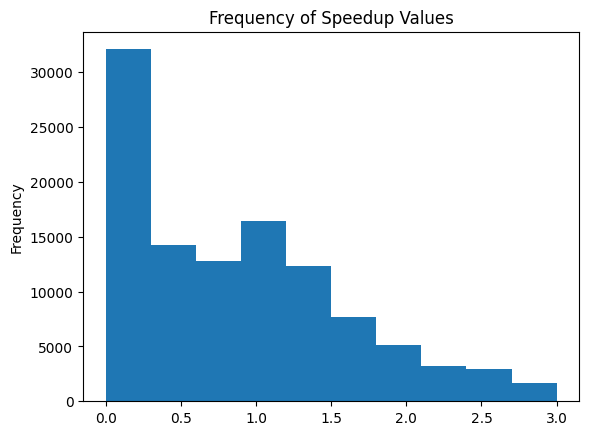

In [68]:
aug_df.speedup.plot.hist(xlabel='speedup', title='Frequency of Speedup Values')

---

EDA on the aug df

Text(0, 0.5, 'Explained Variance Ratio')

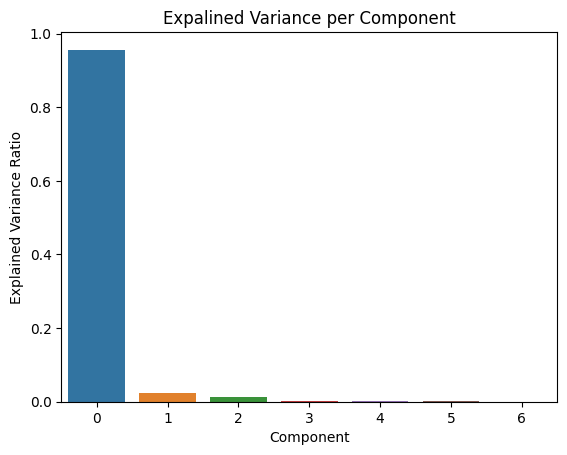

In [69]:
pca = PCA(n_components=7)
embeddings = np.stack(aug_df.embeddings.map(np.array).to_numpy())
embeddings = pca.fit_transform(embeddings)

sns.barplot(x=np.arange(pca.n_components_), y=pca.explained_variance_ratio_)
plt.title("Expalined Variance per Component")
plt.xlabel("Component")
plt.ylabel("Explained Variance Ratio")

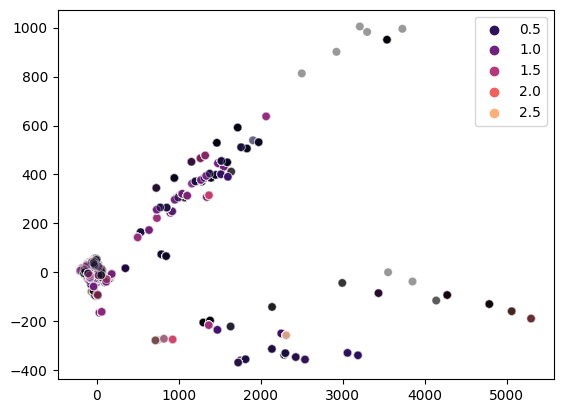

In [70]:
c1, c2 = np.argsort(pca.explained_variance_ratio_)[-2:][::-1]

sns.scatterplot(
    x=embeddings[:,c1],
    y=embeddings[:,c2],
    hue=aug_df.speedup,
    palette=sns.color_palette("magma", as_cmap=True),
    alpha=0.4
)
plt.legend()

Text(0, 0.5, 'Explained Variance Ratio')

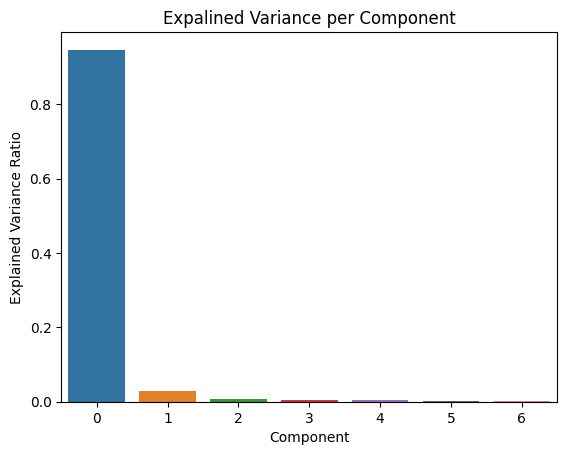

In [71]:
no_main_df = aug_df[aug_df.function != 'main']

pca = PCA(n_components=7)
embeddings = np.stack(no_main_df.embeddings.map(np.array).to_numpy())
embeddings = pca.fit_transform(embeddings)

sns.barplot(x=np.arange(pca.n_components_), y=pca.explained_variance_ratio_)
plt.title("Expalined Variance per Component")
plt.xlabel("Component")
plt.ylabel("Explained Variance Ratio")

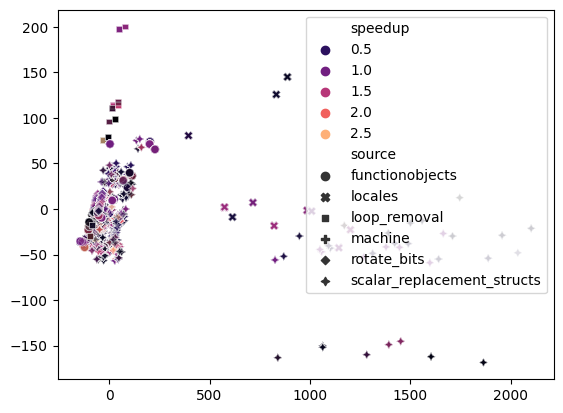

In [72]:
c1, c2 = np.argsort(pca.explained_variance_ratio_)[-2:][::-1]

sns.scatterplot(
    x=embeddings[:,c1],
    y=embeddings[:,c2],
    hue=no_main_df.speedup,
    style=no_main_df.source,
    palette=sns.color_palette("magma", as_cmap=True),
    alpha=0.4
)
plt.legend()

(array([9.8352e+04, 4.3430e+03, 1.1000e+02, 9.3000e+01, 1.2100e+03,
        1.1110e+03, 1.8700e+02, 5.9900e+02, 1.9400e+02, 9.4000e+01]),
 array([-143.51141365,   81.01282383,  305.53706131,  530.06129879,
         754.58553627,  979.10977375, 1203.63401123, 1428.15824871,
        1652.68248619, 1877.20672367, 2101.73096115]),
 <BarContainer object of 10 artists>)

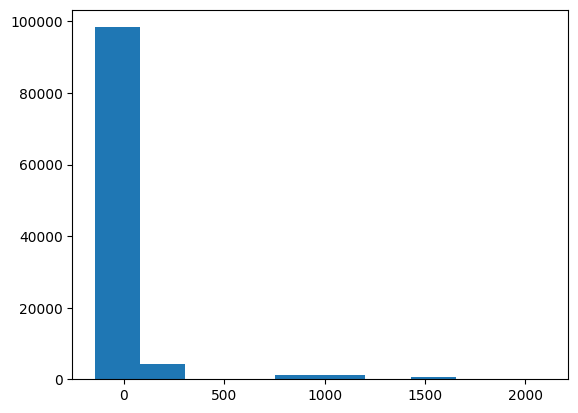

In [73]:
plt.hist(embeddings[:,c1])

(array([5.5100e+02, 0.0000e+00, 4.1000e+01, 2.1937e+04, 6.8698e+04,
        6.7080e+03, 3.5210e+03, 3.4690e+03, 3.0300e+02, 1.0650e+03]),
 array([-168.53036588, -131.64337844,  -94.756391  ,  -57.86940355,
         -20.98241611,   15.90457133,   52.79155878,   89.67854622,
         126.56553366,  163.45252111,  200.33950855]),
 <BarContainer object of 10 artists>)

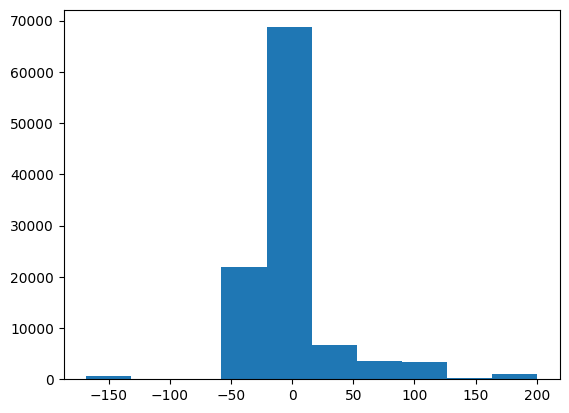

In [74]:
plt.hist(embeddings[:,c2])

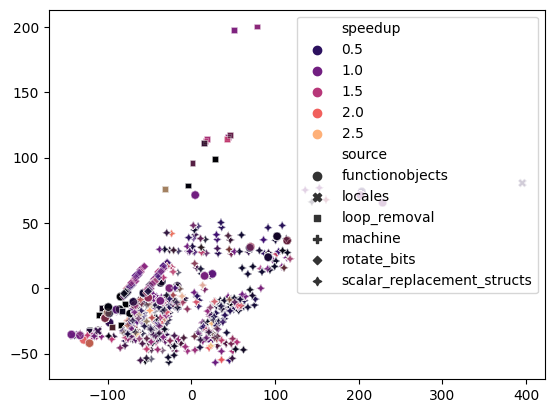

In [75]:
c1, c2 = np.argsort(pca.explained_variance_ratio_)[-2:][::-1]

mask = embeddings[:,c1] < 500

sns.scatterplot(
    x=embeddings[:,c1][mask],
    y=embeddings[:,c2][mask],
    hue=no_main_df.speedup[mask],
    style=no_main_df.source[mask],
    palette=sns.color_palette("magma", as_cmap=True),
    alpha=0.4
)
plt.legend()

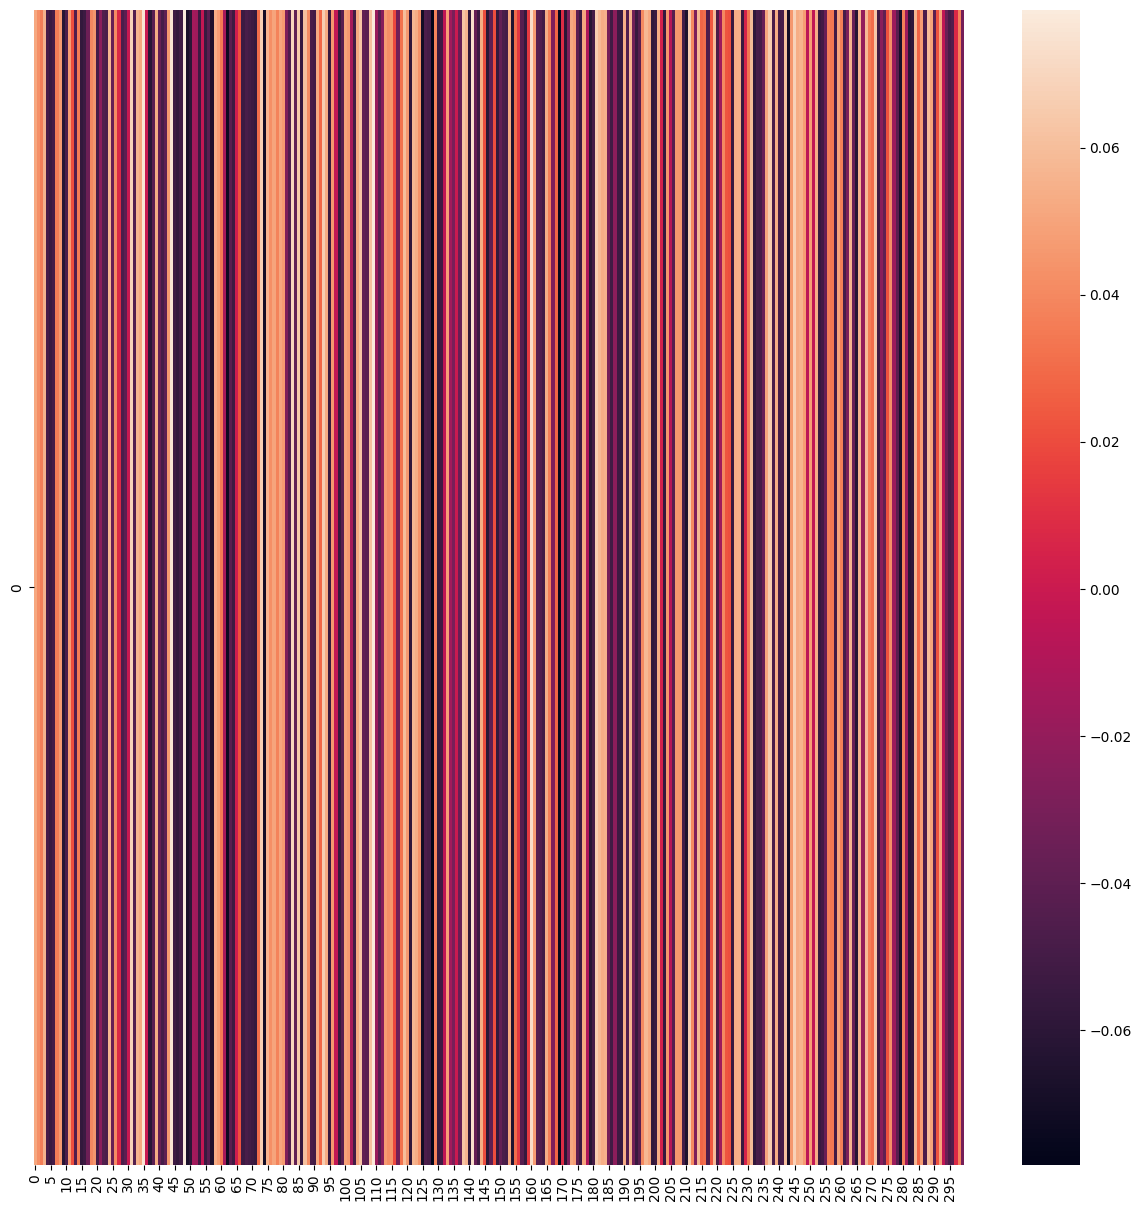

In [76]:
corr_df =\
pd.concat(
    [
        pd.DataFrame(aug_df.embeddings.to_list()),
        aug_df.reset_index().speedup
    ],
    axis=1,
    ignore_index=True
)

C_mat = corr_df.corr().to_numpy()
fig = plt.figure(figsize = (15,15))

sns.heatmap(C_mat[300:301,:300])
plt.show()

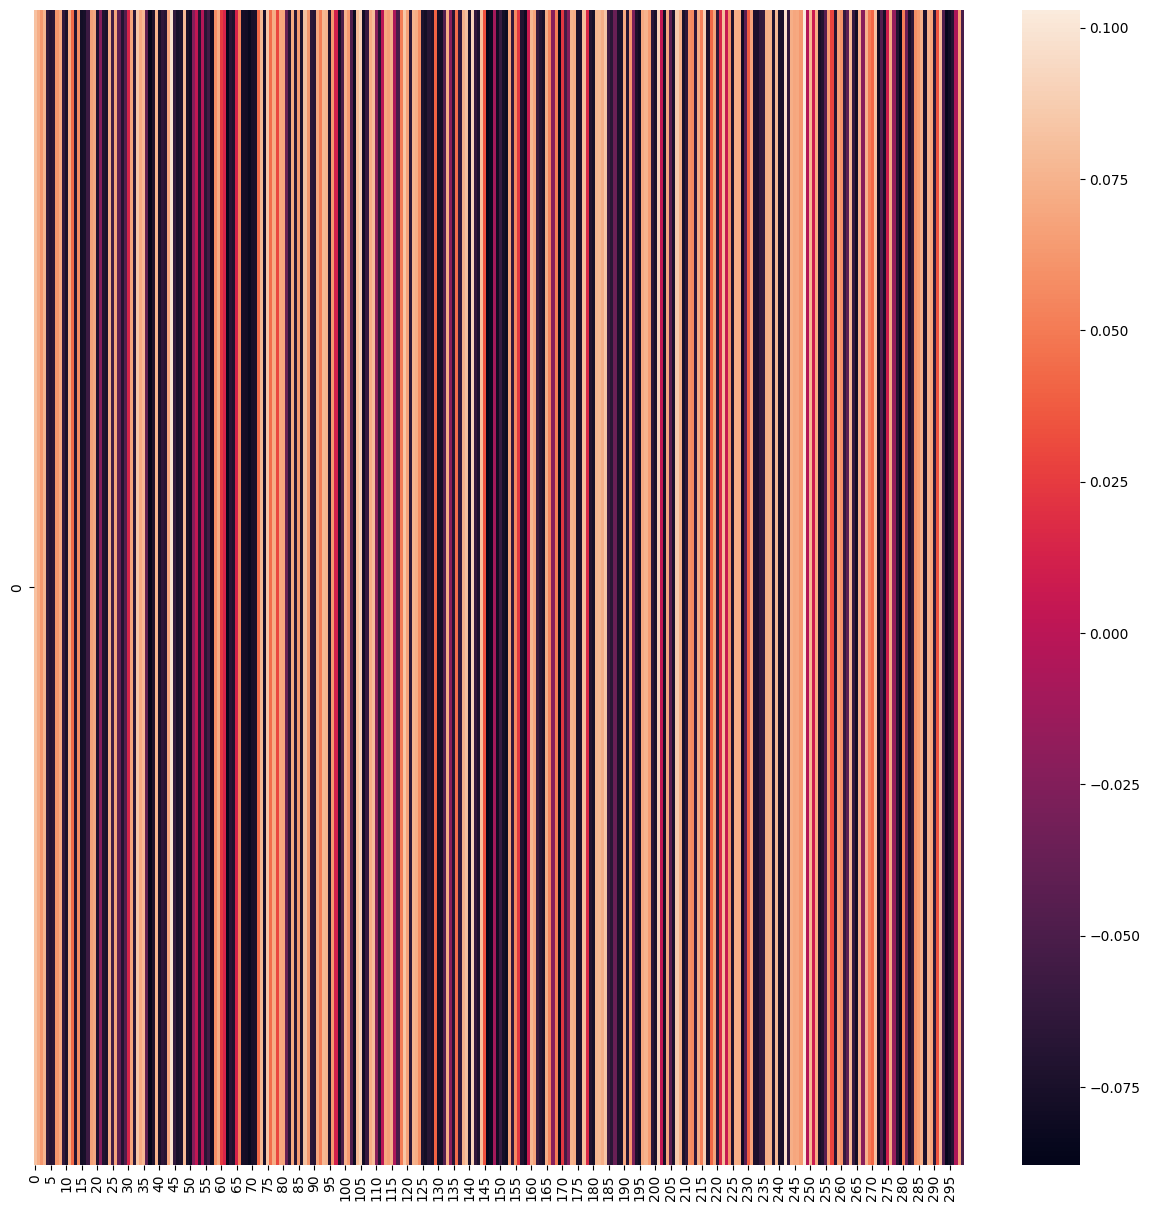

In [77]:
corr_df =\
pd.concat(
    [
        pd.DataFrame(no_main_df.embeddings.to_list()),
        no_main_df.reset_index().speedup
    ],
    axis=1,
    ignore_index=True
)

C_mat = corr_df.corr().to_numpy()
fig = plt.figure(figsize = (15,15))

sns.heatmap(C_mat[300:301,:300])
plt.show()

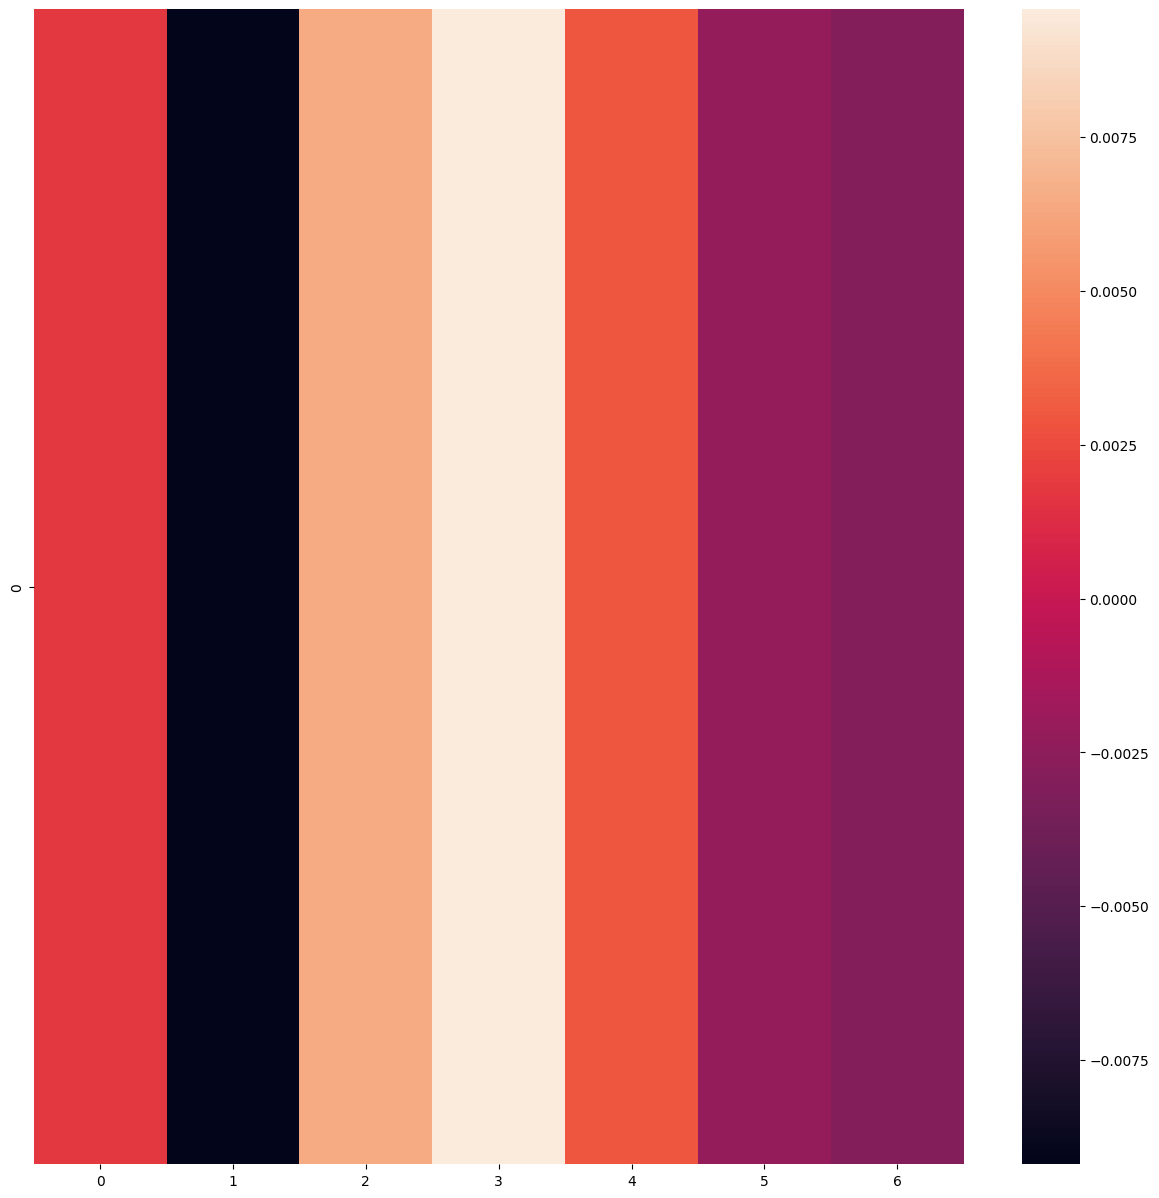

In [78]:
pca = PCA(n_components=7)
embeddings = np.stack(no_main_df.embeddings.map(np.array).to_numpy())
embeddings = pca.fit_transform(embeddings)

corr_df =\
pd.concat(
    [
        pd.DataFrame(embeddings),
        aug_df.reset_index().speedup
    ],
    axis=1,
    ignore_index=True
)

C_mat = corr_df.corr().to_numpy()
fig = plt.figure(figsize = (15,15))

sns.heatmap(C_mat[7:8,:7])
plt.show()

---

Train!

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [80]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.regularizers import l2

2024-04-22 16:25:34.131827: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-22 16:25:34.175388: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model

In [81]:
def create_model(input_dim=7, reg=0.0):
    model = models.Sequential()
    
    model.add(layers.Dense(input_dim,
                           input_shape=(input_dim,),
                           kernel_regularizer=l2(reg),
                           bias_regularizer=l2(reg)))
    #model.add(layers.Dropout(rate=0.5))
    model.add(layers.LeakyReLU())
    
#     model.add(layers.Dense(32,
#                            input_shape=(input_dim,),
#                            kernel_regularizer=l2(reg),
#                            bias_regularizer=l2(reg)))
#     #model.add(layers.Dropout(rate=0.5))
#     model.add(layers.LeakyReLU())
    
#     model.add(layers.Dense(64,
#                            input_shape=(input_dim,),
#                            kernel_regularizer=l2(reg),
#                            bias_regularizer=l2(reg)))
#     #model.add(layers.Dropout(rate=0.5))
#     model.add(layers.LeakyReLU())

#     model.add(layers.Dense(128,
#                            input_shape=(input_dim,),
#                            kernel_regularizer=l2(reg),
#                            bias_regularizer=l2(reg)))
#     #model.add(layers.Dropout(rate=0.5))
#     model.add(layers.LeakyReLU())
    
#     model.add(layers.Dense(256,
#                            input_shape=(128,),
#                            kernel_regularizer=l2(reg),
#                            bias_regularizer=l2(reg)))
#     #model.add(layers.Dropout(rate=0.5))
#     model.add(layers.LeakyReLU())
    
    model.add(layers.Dense(512,
                           input_shape=(128,),
                           kernel_regularizer=l2(reg),
                           bias_regularizer=l2(reg)))
    #model.add(layers.Dropout(rate=0.5))
    model.add(layers.LeakyReLU())
    
    model.add(layers.Dense(256,
                           input_shape=(128,),
                           kernel_regularizer=l2(reg),
                           bias_regularizer=l2(reg)))
    #model.add(layers.Dropout(rate=0.5))
    model.add(layers.LeakyReLU())
    
    model.add(layers.Dense(128,
                           input_shape=(128,),
                           kernel_regularizer=l2(reg),
                           bias_regularizer=l2(reg)))
    #model.add(layers.Dropout(rate=0.5))
    model.add(layers.LeakyReLU())
    
    model.add(layers.Dense(64,
                           input_shape=(input_dim,),
                           kernel_regularizer=l2(reg),
                           bias_regularizer=l2(reg)))
    #model.add(layers.Dropout(rate=0.5))
    model.add(layers.LeakyReLU())
    
    model.add(layers.Dense(32,
                           input_shape=(256,),
                           kernel_regularizer=l2(reg),
                           bias_regularizer=l2(reg)))
    #model.add(layers.Dropout(rate=0.5))
    model.add(layers.LeakyReLU())
    
    model.add(layers.Dense(1,
                           input_shape=(32,),
                           kernel_regularizer=l2(reg),
                           bias_regularizer=l2(reg)))
    
    return model

# util
def extract_features_target(df):
    X = np.stack(df.embeddings.apply(np.array).to_numpy()).astype(np.float32)
    y = np.expand_dims(df.speedup.to_numpy().astype(np.float32),1)
    return X, y

In [82]:
# # hyperparameters
# epochs = 10
# batch_size = 256
# reg=0.00

# source_df = no_main_df

# # recording
# training_reports = []

# sources = source_df.source.unique()
# for left_out_idx in range(len(sources))[:1]:
#     left_out = sources[left_out_idx]
#     print("Leaving out", left_out)
    
#     train_df = source_df[source_df.source != left_out]
#     test_df = source_df[source_df.source == left_out]

#     # preprocess
#     ## extract our data and labels
#     train_X, train_y = extract_features_target(train_df)
#     test_X, test_y = extract_features_target(test_df)
    
#     ## scale + reduce dimensionality
#     preprocess_pipeline = Pipeline([
#         ('scale', StandardScaler()),
#         #('dimreduce', PCA(n_components=7))
#     ]).fit(train_X)

#     train_X = preprocess_pipeline.transform(train_X)
#     print("train_X.shape =", train_X.shape)
    
#     test_X = preprocess_pipeline.transform(test_X)
#     print("test_X.shape =", test_X.shape)
    
    
#     # actually do the training
#     model = create_model(input_dim=300, reg=reg)
#     model.compile(
#         optimizer='adam',
#         loss=tf.keras.losses.MeanSquaredError(),
#         #metrics=['root_mean_squared_error']
#     )
#     history = model.fit(train_X,
#                         train_y,
#                         epochs=epochs,
#                         batch_size=batch_size,
#                         validation_data=(test_X, test_y)
#     )
    
#     training_reports.append({
#         "left_out": left_out,
#         "history": history,
#         "model": model
#     })

In [83]:
# for report in training_reports:
#     plt.figure()
    
#     history = report['history'].history
    
#     plt.plot(history['loss'], label='train')
#     plt.plot(history['val_loss'], label='test')
    
#     plt.xlabel('Epoch')
#     plt.ylabel('MSE Loss')
#     plt.title(f"{report['left_out']} left out")
    
#     plt.legend()

In [84]:
# for report in training_reports:
#     fig, axs = plt.subplots(1,2)
    
#     model = report["model"]
    
#     fig.suptitle(report['left_out'])
#     for ax, (X,y), label in zip(axs.ravel(), [(train_X, train_y), (test_X, test_y)], ['train', 'test']):
#         pred = model.predict(X)
#         indices = np.argsort(y[:,0])
#         ax.plot(y[indices,0], label='actual')
#         ax.plot(pred[indices], label='pred')
#         ax.set_title(label)

In [85]:
# test_y_pred = model.predict(test_X)
# y_pred = model.predict(train_X)

In [86]:
# indices = np.argsort(train_y[:,0])
# plt.plot(train_y[indices,0], label='actual')
# plt.plot(y_pred[indices,0], label='predict')
# plt.title('Fit of Model to Training Data')
# plt.legend()

In [87]:
# indices = np.argsort(test_y[:,0])
# plt.plot(test_y[indices,0], label='actual')
# plt.plot(test_y_pred[indices,0], label='predicted')
# plt.legend()

---

XGBoost Random Forest

In [88]:
from xgboost import XGBRFRegressor

In [89]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2024-04-22 16:25:36.879045: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1638] Created device /device:GPU:0 with 13797 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:61:00.0, compute capability: 7.5


True

In [90]:
# recording
training_reports = []

# params
source_df = no_main_df
tree_method = 'gpu_hist' if tf.test.is_gpu_available() else 'hist'

sources = aug_df.source.unique()
for left_out_idx in tqdm(range(len(sources))):
    left_out = sources[left_out_idx]
    print("Leaving out", left_out)
    
    train_df = source_df[source_df.source != left_out]
    test_df = source_df[source_df.source == left_out]

    # preprocess
    ## extract our data and labels
    train_X, train_y = extract_features_target(train_df)
    test_X, test_y = extract_features_target(test_df)
    
    ## scale + reduce dimensionality
#     preprocess_pipeline = Pipeline([
#         ('scale', StandardScaler()),
#         ('dimreduce', PCA(n_components=7))
#     ]).fit(train_X)

#     train_X = preprocess_pipeline.transform(train_X)
#     print("train_X.shape =", train_X.shape)
    
#     test_X = preprocess_pipeline.transform(test_X)
#     print("test_X.shape =", test_X.shape)
    
    
    # actually do the training
    model = Pipeline([
        ('scale', StandardScaler()),
        #('dimreduc', PCA(n_components=7)),
        ('model', XGBRFRegressor(n_estimators=100,
                                 eta=0.01,
                                 reg_lambda=1,
                                 alpha=0,
                                 subsample=0.5,
                                 colsample_bynode=0.2,
                                 max_depth=256,
                                 sampling_method='gradient_based',
                                 tree_method=tree_method))
    ]).fit(train_X, train_y)
    
    train_score = model.score(train_X, train_y)
    test_score = model.score(test_X, test_y)
    print("\ttrain score =", train_score)
    print("\ttest score =", test_score)
    
    training_reports.append({
        "left_out": left_out,
        "history": [train_score, test_score],
        "model": model
    })

2024-04-22 16:25:36.894570: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1638] Created device /device:GPU:0 with 13797 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:61:00.0, compute capability: 7.5
  0%|          | 0/5 [00:00<?, ?it/s]

Leaving out functionobjects


 20%|██        | 1/5 [00:07<00:30,  7.65s/it]

	train score = 0.11805914787925809
	test score = -0.029774935732041374
Leaving out locales


 40%|████      | 2/5 [00:16<00:24,  8.20s/it]

	train score = 0.12899237477115344
	test score = 0.21243683982331474
Leaving out loop_removal


 60%|██████    | 3/5 [00:24<00:16,  8.13s/it]

	train score = 0.14699173785216946
	test score = -0.02604487555511681
Leaving out rotate_bits


 80%|████████  | 4/5 [00:31<00:07,  7.79s/it]

	train score = 0.15951610027925855
	test score = -0.030036279848407732
Leaving out scalar_replacement_structs


100%|██████████| 5/5 [00:36<00:00,  7.38s/it]

	train score = 0.10576569473755981
	test score = -0.05409353510696868


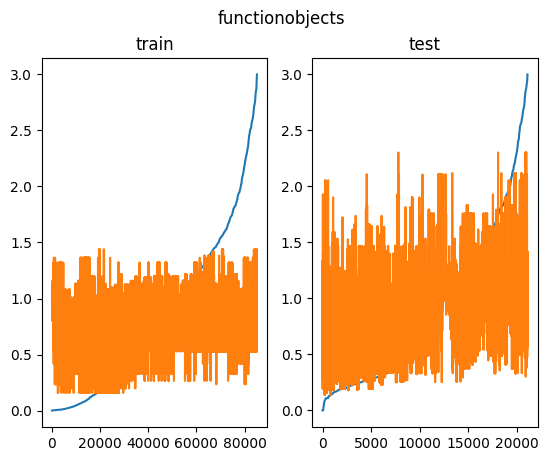

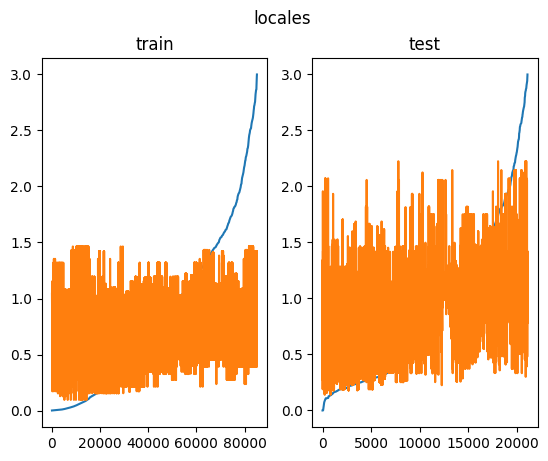

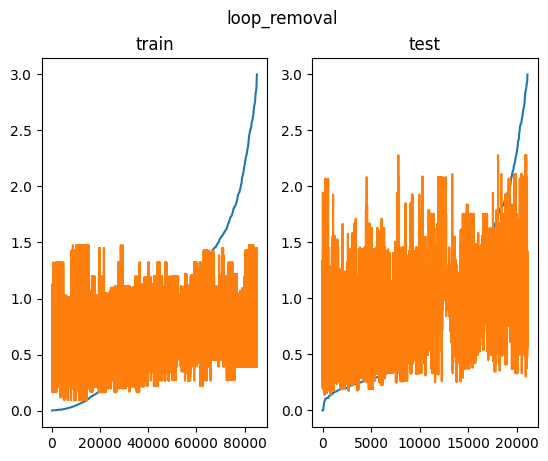

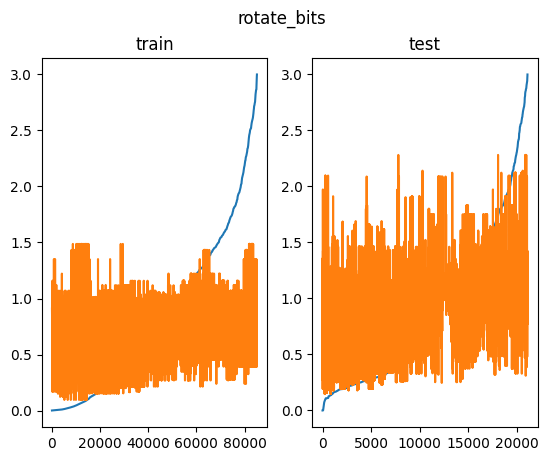

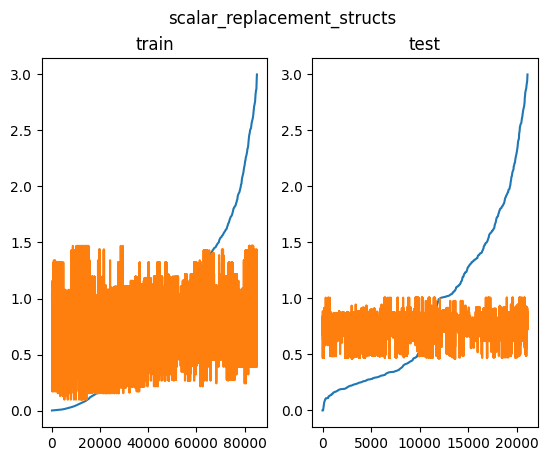

In [91]:
for report in training_reports:
    fig, axs = plt.subplots(1,2)
    
    model = report["model"]
    
    fig.suptitle(report['left_out'])
    for ax, (X,y), label in zip(axs.ravel(), [(train_X, train_y), (test_X, test_y)], ['train', 'test']):
        pred = model.predict(X)
        indices = np.argsort(y[:,0])
        ax.plot(y[indices,0], label='actual')
        ax.plot(pred[indices], label='pred')
        ax.set_title(label)

score = 0.13665718795961546


Text(0.5, 1.0, 'all the data')

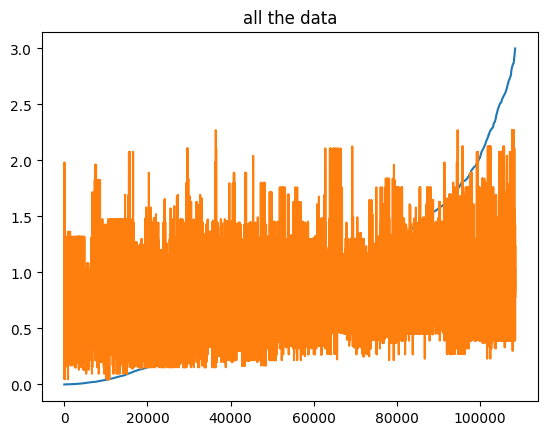

In [92]:
X, y = extract_features_target(aug_df)
model = Pipeline([
        ('scale', StandardScaler()),
        #('dimreduc', PCA(n_components=7)),
        ('model', XGBRFRegressor(n_estimators=100,
                                 reg_lambda=1,
                                 alpha=0,
                                 subsample=0.5,
                                 colsample_bynode=0.2,
                                 max_depth=256,
                                 sampling_method='gradient_based',
                                 tree_method=tree_method))
    ])
    
model.fit(X, y)
print("score =", model.score(X,y))

pred = model.predict(X)
indices = np.argsort(y[:,0])
plt.plot(y[indices,0], label='actual')
plt.plot(pred[indices], label='predicted')
plt.title('IR2Perf Performance')
plt.xlabel('Data')
plt.ylabel('Func Speedup')
plt.legend()

In [93]:
import pickle

In [94]:
with open('xgboost-rf-model.pickle', 'wb') as datafile:
    pickle.dump(model, datafile)

In [95]:
!pip list | grep xgboost

xgboost                       1.7.5
